Bosques Aleatorios
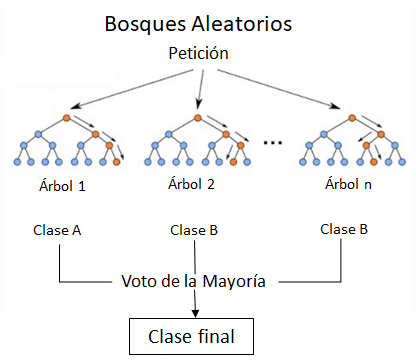

In [1]:
#Comenzamos importando librerias
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Cargamos el dataset
df = pd.read_csv('C:\\Users\\yetla\\Downloads\\Detecci_n.csv')
df.head()

,pre_ndvi,post_ndvi,delta_ndvi,quem
0,0.524724,0.139505,0.385219,1
1,0.870429,0.819945,0.050484,0
2,0.739196,0.642219,0.096977,0
3,0.659195,0.120063,0.539133,1
4,0.393611,0.029754,0.363857,1


In [4]:
#Comenzamos con la clasificacion
X = df[["pre_ndvi","post_ndvi","delta_ndvi"]]
y = df["quem"]

In [5]:
#Pasamos al entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
#Mostramos el resultado
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) #Matriz de confusion


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        24
           1       1.00      0.97      0.99        36

    accuracy                           0.98        60
   macro avg       0.98      0.99      0.98        60
weighted avg       0.98      0.98      0.98        60

[[24  0]
 [ 1 35]]


In [6]:
#Creamos un dataframe con los| resultados importantes
importancia_df = pd.DataFrame({"variable": X.columns, 
                               "importancia": modelo.feature_importances_
                               }).sort_values(by="importancia", ascending=False).reset_index(drop=True)

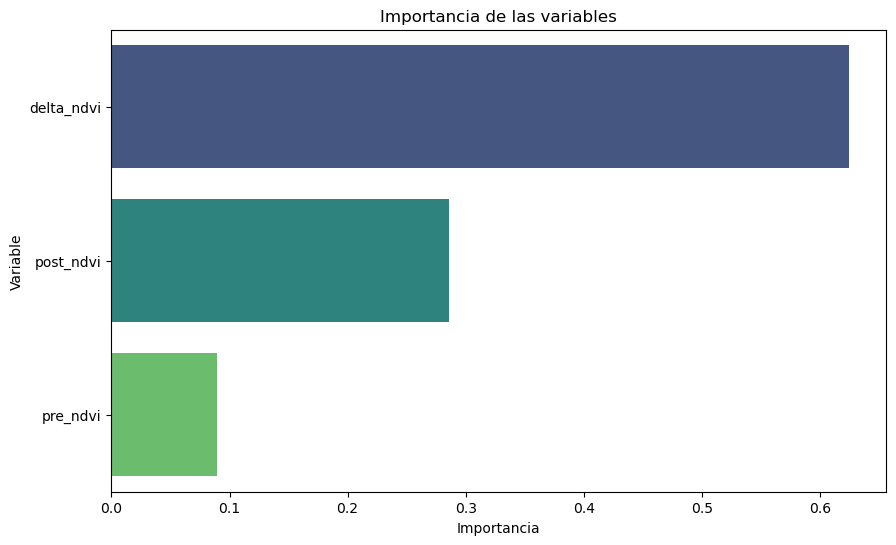

In [7]:
#graficamos la importancia de las variables
plt.figure(figsize=(10, 6))
sns.barplot(x="importancia", y="variable", data=importancia_df, palette="viridis")
plt.title("Importancia de las variables")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.show()

In [8]:
#Ejercicio: determinar si la universidad necesita ampliar sus espacios educativos
#Comenzamos importando librerias
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree


In [9]:
# Importamos el dataset
df = pd.read_csv('C:\\Users\\yetla\\Downloads\\espacios_educativos.csv')
df.head()

,estudiantes_actuales,crecimiento_anual,aulas_disponibles,turnos,tasa_abandono,necesita_expansion
0,1926,0.027092,57,2,0.287380,0
1,2259,0.059882,34,3,0.086768,0
2,1660,0.136956,49,3,0.281647,0
3,2094,0.048099,54,1,0.173029,1
4,1930,0.100677,10,2,0.114561,1


In [10]:
#Notemos que la variable objetivo es "necesita_espacios"
#Definimos las variables predictoras y la variable objetivo
X = df[['estudiantes_actuales', 'crecimiento_anual', 'aulas_disponibles', 'turnos', 'tasa_abandono']]
y = df['necesita_expansion']


In [12]:
#Entrenamos el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
modelo = RandomForestClassifier(random_state=42, n_estimators=100)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
#Mostramos el resultado
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred)) #Matriz de confusion


              precision    recall  f1-score   support

           0       0.82      0.85      0.84        33
           1       0.81      0.78      0.79        27

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.81        60
weighted avg       0.82      0.82      0.82        60

[[28  5]
 [ 6 21]]


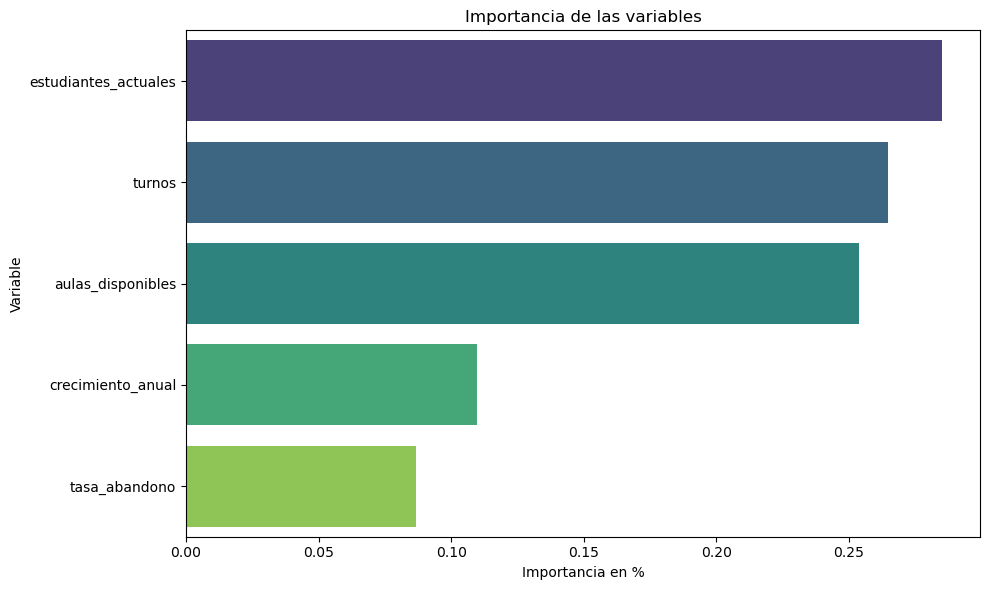

In [13]:
# Importancia de las variables
importancia_df = pd.DataFrame({
    'variable': X.columns,
    'importancia': modelo.feature_importances_
    }).sort_values(by='importancia', ascending=False).reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importancia', y='variable', data=importancia_df, palette='viridis')
plt.title('Importancia de las variables')
plt.xlabel('Importancia en %')
plt.ylabel('Variable')
plt.tight_layout()
plt.show()

## 📚 Conclusión

El análisis mediante un modelo de 🌳 Random Forest muestra que el factor más determinante para decidir la ampliación de espacios educativos en la universidad es el número de estudiantes actuales, representando más del 📈 25% de la importancia relativa entre las variables evaluadas.

El modelo alcanza una precisión general del ✅ 82% y un recall del 🔍 78% para detectar correctamente las situaciones en las que se requiere expansión, lo que indica un nivel de confiabilidad adecuado.

Por lo tanto, se concluye que la universidad debería considerar la expansión de sus espacios educativos 🏫 principalmente cuando el número de estudiantes actuales se acerque o supere los límites de la infraestructura disponible.
